# Parte voluntaria


En este apartado se presenta un análisis de los resultados obtenidos a partir del conjunto completo de calificaciones correspondientes a todos los estudiantes y materias evaluadas en la fase voluntaria. El total de registros analizados asciende a 99 calificaciones (n = 99).

## 1. Carga de los datos

Cargamos los datos desde un archivo Excel y se informa si tuvo éxito o si ocurrió algún problema (como no encontrar el archivo).

In [ ]:
import pandas as pd

try:
    df = pd.read_excel('proba_voluntaria.xlsx')
    print("Datos cargados exitosamente.")
    display(df)
except FileNotFoundError:
    print("Error: El archivo 'Proba_voluntaria.xlsx' no fue encontrado. Por favor, asegúrate de que el archivo esté en la ubicación correcta.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Datos cargados exitosamente.


,Número\nInscrición,DNI,Apelidos,Nome,Cod. Mat. Opt. 1,Mat. Opt. 1,Cualif. Mat Opt. 1,Apto 1,Cod. Mat. Opt. 2,Mat. Opt. 2,Cualif. Mat Opt. 2,Apto 2,Cod. Mat. Opt. 3,Mat. Opt. 3,Cualif. Mat Opt. 3,Apto 3
0,4449-001,35641492W,ÁLVAREZ GRAÑA,ERIC,62,Francés,2.5,Non apto,81.0,Coro e Técnica Vocal II,9,Apto,NaN,NaN,NaN,NaN
1,4449-002,77681389Q,AMMI GUAROUACH,ZARA,33,Historia da Arte,3.25,Non apta,35.0,Xeografía,Non presentada,NaN,62.0,Francés,5,Apta
2,4449-003,77548365R,ARIAS PORTELA,JOSÉ,23,Física,Non presentado,NaN,26.0,Tecnoloxía e Enxeñaría II,10,Apto,40.0,Matemáticas Ap. ás CCSS,6.25,Apto
3,4449-005,77479961E,CABO SENRA,MARTÍN,23,Física,3.25,Non apto,26.0,Tecnoloxía e Enxeñaría II,7.75,Apto,40.0,Matemáticas Ap. ás CCSS,7.5,Apto
4,4449-006,53862596T,CALVIÑO ALMAZÁN,PATRICIA,21,Bioloxía,10,Apta,24.0,Química,8.5,Apta,NaN,NaN,NaN,NaN
5,4449-007,54383404L,CALVIÑO MUÑIZ,ERIKA,21,Bioloxía,5.5,Apta,40.0,Matemáticas Ap. ás CCSS,1.25,Non apta,NaN,NaN,NaN,NaN
6,4449-008,54320110K,CALVO DURÁN,ADÁN,23,Física,5.5,Apto,26.0,Tecnoloxía e Enxeñaría II,7.5,Apto,NaN,NaN,NaN,NaN
7,4449-009,53863241R,CASADO MIRANDA,UXÍA,62,Francés,5.5,Apta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4449-010,49671266Y,CASAL SÁNCHEZ,NURIA,20,Matemáticas II,Non presentada,NaN,21.0,Bioloxía,5.75,Apta,NaN,NaN,NaN,NaN
9,4449-011,77478979Y,CASTRO CANCELA,LAURA,21,Bioloxía,1.5,Non apta,24.0,Química,0.5,Non apta,40.0,Matemáticas Ap. ás CCSS,1,Non apta


## 2. Preparación de los datos

## **1. Análisis y distribución de calificaciones individuales (sin diferenciar materias voluntarias)**



,count,mean,std,min,25%,50%,75%,max
Calificación,99.0,5.527778,2.333728,0.0,4.125,5.75,6.875,10.0


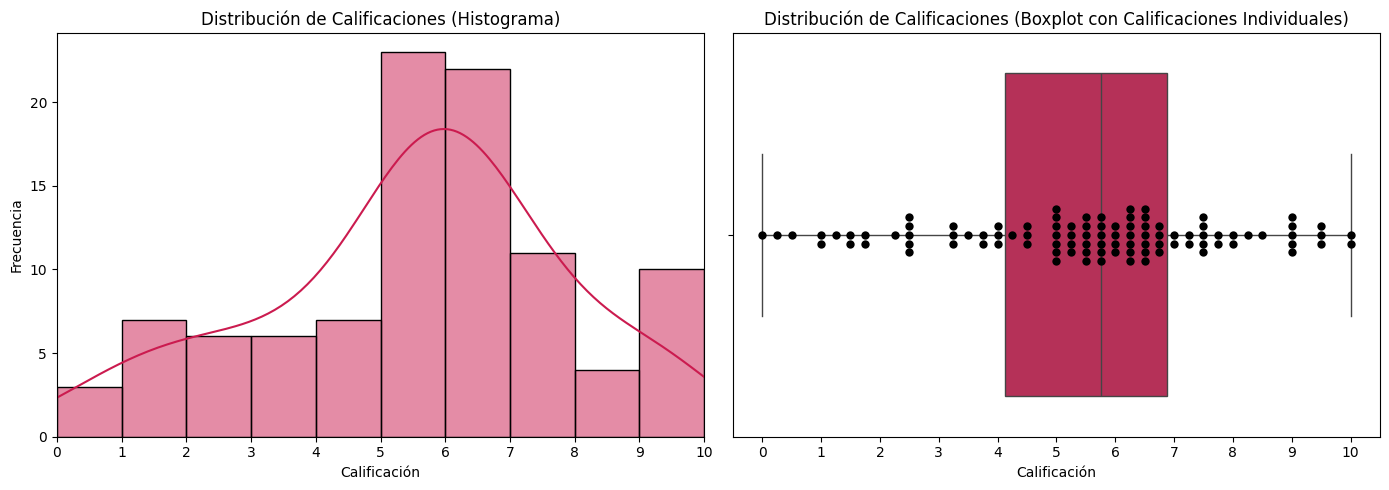

In [ ]:
description_df = df_cleaned['Calificación'].describe().to_frame().T
display(description_df)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Ensure pandas is imported

# Ensure 'Calificación' is numeric and handle errors right before plotting
# Replace "Non presentado" with NaN and convert to numeric
df_cleaned['Calificación'] = df_cleaned['Calificación'].replace('Non presentado', np.nan)
df_cleaned['Calificación'] = pd.to_numeric(df_cleaned['Calificación'], errors='coerce')

# Drop rows with NaN in 'Calificación' for plotting if necessary, although plotting functions can often handle NaNs
# For histplot and boxplot, NaNs are usually ignored, but explicit dropna can be safer
qualifications_for_plot = df_cleaned['Calificación'].dropna()

# Define a color from a palette
plot_color = sns.color_palette('rocket', 1)[0] # Get the first color from the viridis palette


# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot the histogram on the first subplot
sns.histplot(qualifications_for_plot, bins=10, kde=True, ax=axes[0], color=plot_color) # Use the defined color
axes[0].set_title('Distribución de Calificaciones (Histograma)')
axes[0].set_xlabel('Calificación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks(np.arange(0, 11, 1))
axes[0].set_xlim(0, 10)

# Plot the boxplot and swarmplot on the second subplot
sns.boxplot(x=qualifications_for_plot, ax=axes[1], color=plot_color) # Use the defined color
sns.swarmplot(x=qualifications_for_plot, color='black', size=6, ax=axes[1])
axes[1].set_title('Distribución de Calificaciones (Boxplot con Calificaciones Individuales)')
axes[1].set_xlabel('Calificación')
axes[1].set_ylabel('')
axes[1].set_xticks(np.arange(0, 11, 1))
axes[1].set_xlim(-0.5, 10.5)

plt.tight_layout()
plt.show()

## 3. 📊 **Análisis Estadístico**

Los principales valores estadísticos de las calificaciones son:

| Estadístico       | Valor |
| ----------------- | ----- |
| Número de datos   | 99    |
| Media (mean)      | 5.53  |
| Desviación típica | 2.33  |
| Mínimo            | 0.0   |
| 1er cuartil (Q1)  | 4.13  |
| Mediana (Q2)      | 5.75  |
| 3er cuartil (Q3)  | 6.88  |
| Máximo            | 10.0  |

* La **media** (5.53) y la **mediana** (5.75) están bastante próximas, lo cual indica una distribución **ligeramente simétrica o levemente sesgada a la izquierda**.
* La **desviación estándar** (2.33) indica que hay **una dispersión moderada** de las calificaciones.
* Hay calificaciones **mínimas de 0** y máximas de **10**, lo que muestra **todo el rango posible** de puntuación.

---

### 📉 **Análisis del Histograma**

* El histograma muestra una **alta concentración de calificaciones entre 5 y 7**, especialmente alrededor del 6.
* También hay un número significativo de estudiantes con calificaciones **bajas (0-3)**, aunque menos frecuentes.
* Hay una cola más larga hacia la izquierda, lo que sugiere una **asimetría leve negativa** (algunos valores bajos tiran un poco de la media hacia abajo).
* Se observan menos calificaciones en los extremos altos (8-10), aunque sí hay un pequeño grupo que alcanzó la nota máxima.

---

### 📦 **Análisis del Boxplot**

* El boxplot confirma que la **mayoría de las calificaciones están entre 4,13 (Q1) y 6,88 (Q3)**.
* La mediana está dentro de la caja, lo que refuerza la idea de que **la distribución es casi simétrica**.
* Se observan muchos **puntos individuales fuera del rango intercuartílico**, especialmente hacia calificaciones muy bajas, lo que indica **varios posibles valores atípicos por debajo de 4**.
* Los valores altos (por encima de 8) no se consideran atípicos, ya que no están fuera de los bigotes del boxplot.

---

### ✅ **Conclusiones**

1. **Rendimiento Medio**: La media de 5,53 sugiere que el rendimiento global fue **ligeramente por encima del aprobado**, aunque con una gran variedad de calificaciones.
2. **Concentración en el aprobado**: El grueso del alumnado se concentra entre 5 y 7 puntos, lo que indica que **la mayoría ha aprobado**, pero sin calificaciones especialmente altas.
3. **Existencia de casos extremos**: Hay varios estudiantes con **calificaciones muy bajas**, incluyendo ceros, que podrían representar **ausencias o trabajos no presentados**.
4. **Distribución levemente sesgada**: Aunque la distribución parece casi simétrica, existe una ligera **asimetría negativa** (más notas bajas que altas extremas).
5. **Variabilidad moderada**: La desviación típica muestra que **hay una dispersión significativa**, por lo que **las calificaciones no están muy agrupadas** alrededor de la media.




## **2. Análisis y distribución de calificaciones (diferenciando materias voluntarias)**


## Identificar materias únicas y nº estudiantes calificados

Obtener una lista de todas las materias únicas presentes en el conjunto de datos combinado.


In [ ]:
materias_unicas = df_cleaned['Materia'].unique().tolist()
print("Número de alumnos presentados por materia:")
display(df_cleaned['Materia'].value_counts())


KeyError: 'Materia'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy
import pandas as pd # Import pandas

plt.figure(figsize=(12, 8))

# Use seaborn.barplot for coloring each bar
# Get the counts and reset index to use columns with seaborn
counts_df = df_cleaned['Materia'].value_counts().reset_index()
counts_df.columns = ['Materia', 'Número de Alumnos'] # Rename columns for clarity

# Sort the dataframe by the number of students for ordering
counts_df_sorted = counts_df.sort_values(by='Número de Alumnos', ascending=False)

# Create the bar plot with different colors per materia and ordered by count
ax = sns.barplot(x='Número de Alumnos', y='Materia', data=counts_df_sorted, palette='Set1', alpha=0.6) # Using viridis palette, using sorted data

plt.title('Número de Alumnos Presentados por Materia')
plt.xlabel('Número de Alumnos')
plt.ylabel('Materia')

plt.xticks(np.arange(0, counts_df['Número de Alumnos'].max() + 1, 1)) # Set x-axis ticks to integers


for x_value in np.arange(1, counts_df['Número de Alumnos'].max() + 1, 1):
    ax.axvline(x=x_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)


plt.tight_layout()
plt.show()

## Histogramas por materias voluntarias

## Generar histogramas por materia

### Subtask:
Iterar sobre cada materia única y crear un histograma de las calificaciones correspondientes.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


materias_unicas = counts_df['Materia'].unique().tolist()


colors = sns.color_palette('Set1', len(materias_unicas))


n_materias = len(materias_unicas)
n_cols = 2
n_rows = (n_materias + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()


consistent_bins = np.arange(0, 11, 1)

for i, materia in enumerate(materias_unicas):
    df_materia = df_cleaned[df_cleaned['Materia'] == materia].copy()
    if not df_materia.empty:
        ax = axes[i]
        sns.histplot(df_materia['Calificación'], bins=consistent_bins, kde=True, color=colors[i], ax=ax)
        ax.set_title(f'Distribución de Calificaciones para {materia}')
        ax.set_xlabel('Calificación')
        ax.set_ylabel('Frecuencia')
        ax.set_xlim(0, 10)
        ax.set_xticks(np.arange(0, 11, 1))
        ax.set_ylim(0, 5)
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))


        y_min, y_max = ax.get_ylim()
        y_ticks = ax.get_yticks()

        for y_value in y_ticks:
            if y_value >= y_min and y_value <= y_max:
                 ax.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pandas as pd

overall_mean_qualification = df_cleaned['Calificación'].mean()

mean_qualifications_by_subject = df_cleaned.groupby('Materia')['Calificación'].mean().reset_index()

# Ensure counts_df_sorted is available from previous steps
# Assuming counts_df_sorted is available from previous steps, if not, calculate it:
if 'counts_df_sorted' not in locals() or counts_df_sorted is None:
    counts_df = df_cleaned['Materia'].value_counts().reset_index()
    counts_df.columns = ['Materia', 'Número de Alumnos']
    counts_df_sorted = counts_df.sort_values(by='Número de Alumnos', ascending=False)

# Define the order of subjects based on the number of students presented
subject_order = counts_df_sorted['Materia'].tolist()

# Order the mean qualifications DataFrame according to subject_order
# This line is moved outside the conditional block
mean_qualifications_by_subject_ordered = mean_qualifications_by_subject.set_index('Materia').loc[subject_order].reset_index()


# Corrected the syntax error and used 'husl' palette
subject_palette = sns.color_palette('husl', len(subject_order))


plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=df_cleaned, x='Materia', y='Calificación', palette=subject_palette, order=subject_order)
plt.title('Distribución de Calificaciones por Materia con Media General y Medias por Materia (Ordenado por Número de Alumnos)')
plt.xlabel('Materia')
plt.ylabel('Calificación')
plt.ylim(-0.5, 10.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 11, 1))
plt.tight_layout()

mean_line = ax.axhline(overall_mean_qualification, color='red', linestyle='--', linewidth=2, label=f'Media General: {overall_mean_qualification:.2f}')

sns.scatterplot(data=mean_qualifications_by_subject_ordered, x='Materia', y='Calificación', color='white', edgecolor='black', s=100, ax=ax, zorder=5, label='Media por Materia')


sns.swarmplot(data=df_cleaned, x='Materia', y='Calificación', color='black', size=6, ax=ax, alpha=0.8, order=subject_order, label='Calificación Individual')

# Add horizontal lines at each integer division on the y-axis
for y_value in np.arange(0, 11, 1):
    ax.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5, zorder=0) # Add zorder to ensure lines are behind points


try:
    ax.get_legend().remove()
except:
    pass


plt.show()



---



# Conclusiones

## 📈 Análisis detallado de calificaciones por materia (con número de observaciones)

### Introducción

Este análisis parte de los datos de calificaciones numéricas obtenidas en materias optativas por parte del alumnado, procesadas y visualizadas mediante **histogramas**. Se incluye además el número de calificaciones registradas por materia (`n`), lo cual es esencial para:

- Valorar la **representatividad** de los datos.
- Aportar solidez a las interpretaciones estadísticas.
- Detectar posibles **sesgos** derivados de muestras reducidas.

---

### 1. 📊 Distribución del número de calificaciones por materia


Se presenta la tabla ordenada por la columna "n (nº de calificacións)" de mayor a menor:

| Materia                                | n (nº de calificacións) |
|----------------------------------------|---------------------------|
| Bioloxía                               | 19                        |
| Química                                | 14                        |
| Matemáticas Aplicadas ás CCSS         | 10                        |
| Empresa e D.M. Negocio                 | 9                         |
| Fundamentos Artísticos                 | 9                         |
| Física                                 | 6                         |
| Tecnoloxía e Enxeñaría II              | 6                         |
| Francés                                | 5                         |
| Matemáticas II                         | 5                         |
| Deseño                                 | 5                         |
| Xeografía                              | 5                         |
| Historia da Arte                       | 2                         |
| Coro e Técnica Vocal II                | 2                         |
| Latín II                               | 1                         |
| Inglés                                 | 1                         |
| Ciencias Xerais                        | 1                         |


Se observa una variabilidad notable no tamaño de mostra por materia. Algunhas, como **Bioloxía**, **Química** ou **Matemáticas Aplicadas ás CCSS**, contan con datos suficientes para conclusións razoablemente sólidas. En cambio, materias como **Latín II**, **Inglés** ou **Ciencias Xerais** teñen só 1 alumno/a, polo que non se poden extraer conclusións representativas.

---

### 2. 🔍 Conclusiones individuales destacadas

#### 🧪 **Bioloxía (n = 19)**
- Ampla dispersión, con moitas notas entre 5 e 8, pero tamén casos baixos (1–2).
- Mediana próxima ao aprobado.
- Interpretación: materia con rendemento medio, pero gran diversidade de perfís no alumnado.

#### 🧲 **Física (n = 6)**
- Notas entre 3 e 6, sen sobresalientes.
- Mediana lixeiramente inferior ao aprobado.
- Conclusión: materia percibida como difícil. Posible revisión metodolóxica.

#### 🧮 **Matemáticas Aplicadas ás CCSS (n = 10)**
- Notas repartidas en todo o rango, con concentración entre 1 e 7.
- Alta dispersión, con varios suspensos.
- Conclusión: resultados irregulares. Necesaria atención individualizada.

#### 🧑‍🎨 **Deseño / Fundamentos Artísticos (n = 5 / 9)**
- Resultados positivos, con certa dispersión pero sen valores extremadamente baixos.
- Conclusión: materias que favorecen a perfís visuais e creativos.

#### 🧑‍💼 **Empresa e D.M. Negocio (n = 9)**
- Notas xeralmente boas, varias por riba do 8.
- Conclusión: alumnado motivado ou familiarizado co enfoque práctico.

#### 🧪 **Química (n = 14)**
- Resultados moi diversos: de 0 a 9.
- Mediana en torno ao aprobado, pero con suspensos e excelentes.
- Conclusión: materia esixente, pero con alumnado destacado.

#### 🧑‍💻 **Tecnoloxía e Enxeñaría II (n = 6)**
- Notas entre 6 e 9, sen suspensos.
- Conclusión: rendemento alto e homoxéneo.

---

---

### 3. 🧮 Comparativa de resultados por materia REVISAR

| Materia                                | Mediana aprox. | Dispersión | Observaciones clave                            |
| -------------------------------------- | -------------- | ---------- | ---------------------------------------------- |
| Bioloxía                               | Alta (>7)      | Media      | Grupo homogéneo, alto rendimiento general      |
| Debuxo Técnico II                      | Alta (\~7)     | Baja       | Resultados consistentes y buenos               |
| Física                                 | Baja (<5)      | Alta       | Alta tasa de suspensos                         |
| Historia da Arte                       | Baja (<5)      | Media      | Bajo rendimiento generalizado                  |
| Xeografía                              | Media-baja     | Alta       | Grupo muy variado                              |
| Técnicas de expresión gráfico-plástica | Media          | Alta       | Notas diversas; materia dependiente del perfil |
| Francés                                | Baja (<5)      | Baja       | Bajo rendimiento en una muestra pequeña        |
| Tecnoloxía e Enxeñaría II              | Alta           | Baja       | Resultados positivos y homogéneos              |
| Coro e Técnica Vocal II                | Alta           | Nula       | Todos sobresalientes, pero solo 3 alumnos/as   |

---

### 4. 📌 Consideracións xerais

1. **Materias con mellor rendemento**
   - Tecnoloxía e Enxeñaría II, Deseño e Empresa presentan resultados altos e consistentes.
   - Posible bo axuste entre alumnado e contidos.

2. **Materias con rendemento baixo ou irregular**
   - Física, Historia da Arte, Matemáticas Aplicadas ás CCSS, e Química mostran alta dispersión ou concentración de suspensos.
   - Requírese atención metodolóxica e reforzo.

3. **Materias con mostra insuficiente**
   - En materias con **n ≤ 2** (Latín II, Inglés, Coro, Ciencias Xerais), non se poden extraer conclusións sólidas.

---

### 5. 📎 Recomendacións

- Reforzar o acompañamento en materias con moitos suspensos.
- Fomentar boas prácticas metodolóxicas detectadas nas materias con alto rendemento.
- Analizar conxuntamente co profesorado os resultados para detectar factores contextuais.
- Manter un seguimento anual para observar evolucións e impacto das medidas.


In [ ]:
# Combine the relevant columns into a single DataFrame for analysis
df_cleaned = df.melt(id_vars=['Número\nInscrición'], value_vars=['Cualif. Mat Opt. 1', 'Cualif. Mat Opt. 2', 'Cualif. Mat Opt. 3'], var_name='Materia_Opt', value_name='Calificación')

# Map the 'Materia' names from the original df based on the 'Materia_Opt' column and 'Número\nInscrición'
def get_materia_name(row):
    if row['Materia_Opt'] == 'Cualif. Mat Opt. 1':
        return df.loc[df['Número\nInscrición'] == row['Número\nInscrición'], 'Mat. Opt. 1'].iloc[0]
    elif row['Materia_Opt'] == 'Cualif. Mat Opt. 2':
        return df.loc[df['Número\nInscrición'] == row['Número\nInscrición'], 'Mat. Opt. 2'].iloc[0]
    elif row['Materia_Opt'] == 'Cualif. Mat Opt. 3':
        return df.loc[df['Número\nInscrición'] == row['Número\nInscrición'], 'Mat. Opt. 3'].iloc[0]
    return None

df_cleaned['Materia'] = df_cleaned.apply(get_materia_name, axis=1)

# Select and reorder columns
df_cleaned = df_cleaned[['Número\nInscrición', 'Materia', 'Calificación']]

# Replace "Non presentado" with NaN before converting to numeric
df_cleaned['Calificación'] = df_cleaned['Calificación'].replace('Non presentado', np.nan)


# Convert 'Calificación' to numeric, coercing errors
df_cleaned['Calificación'] = pd.to_numeric(df_cleaned['Calificación'], errors='coerce')

# Drop rows where 'Calificación' is NaN (including those that were 'Non presentado') or 'Materia' is NaN
df_cleaned.dropna(subset=['Calificación', 'Materia'], inplace=True)

display(df_cleaned.head())